# Dataset Internships Analysis and Visualization

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3357464201.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['duration_months'] = df['duration'].str.extract('(\d+)').astype(int)
/tmp/ipython-input-3357464201.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='company', data=df, order=df['company'].value_counts().index, palette='viridis', ax=ax1)
/tmp/ipython-input-3357464201.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=df_skills, palette='magma', ax=ax4)
/tmp/ipython-input-3357464201.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

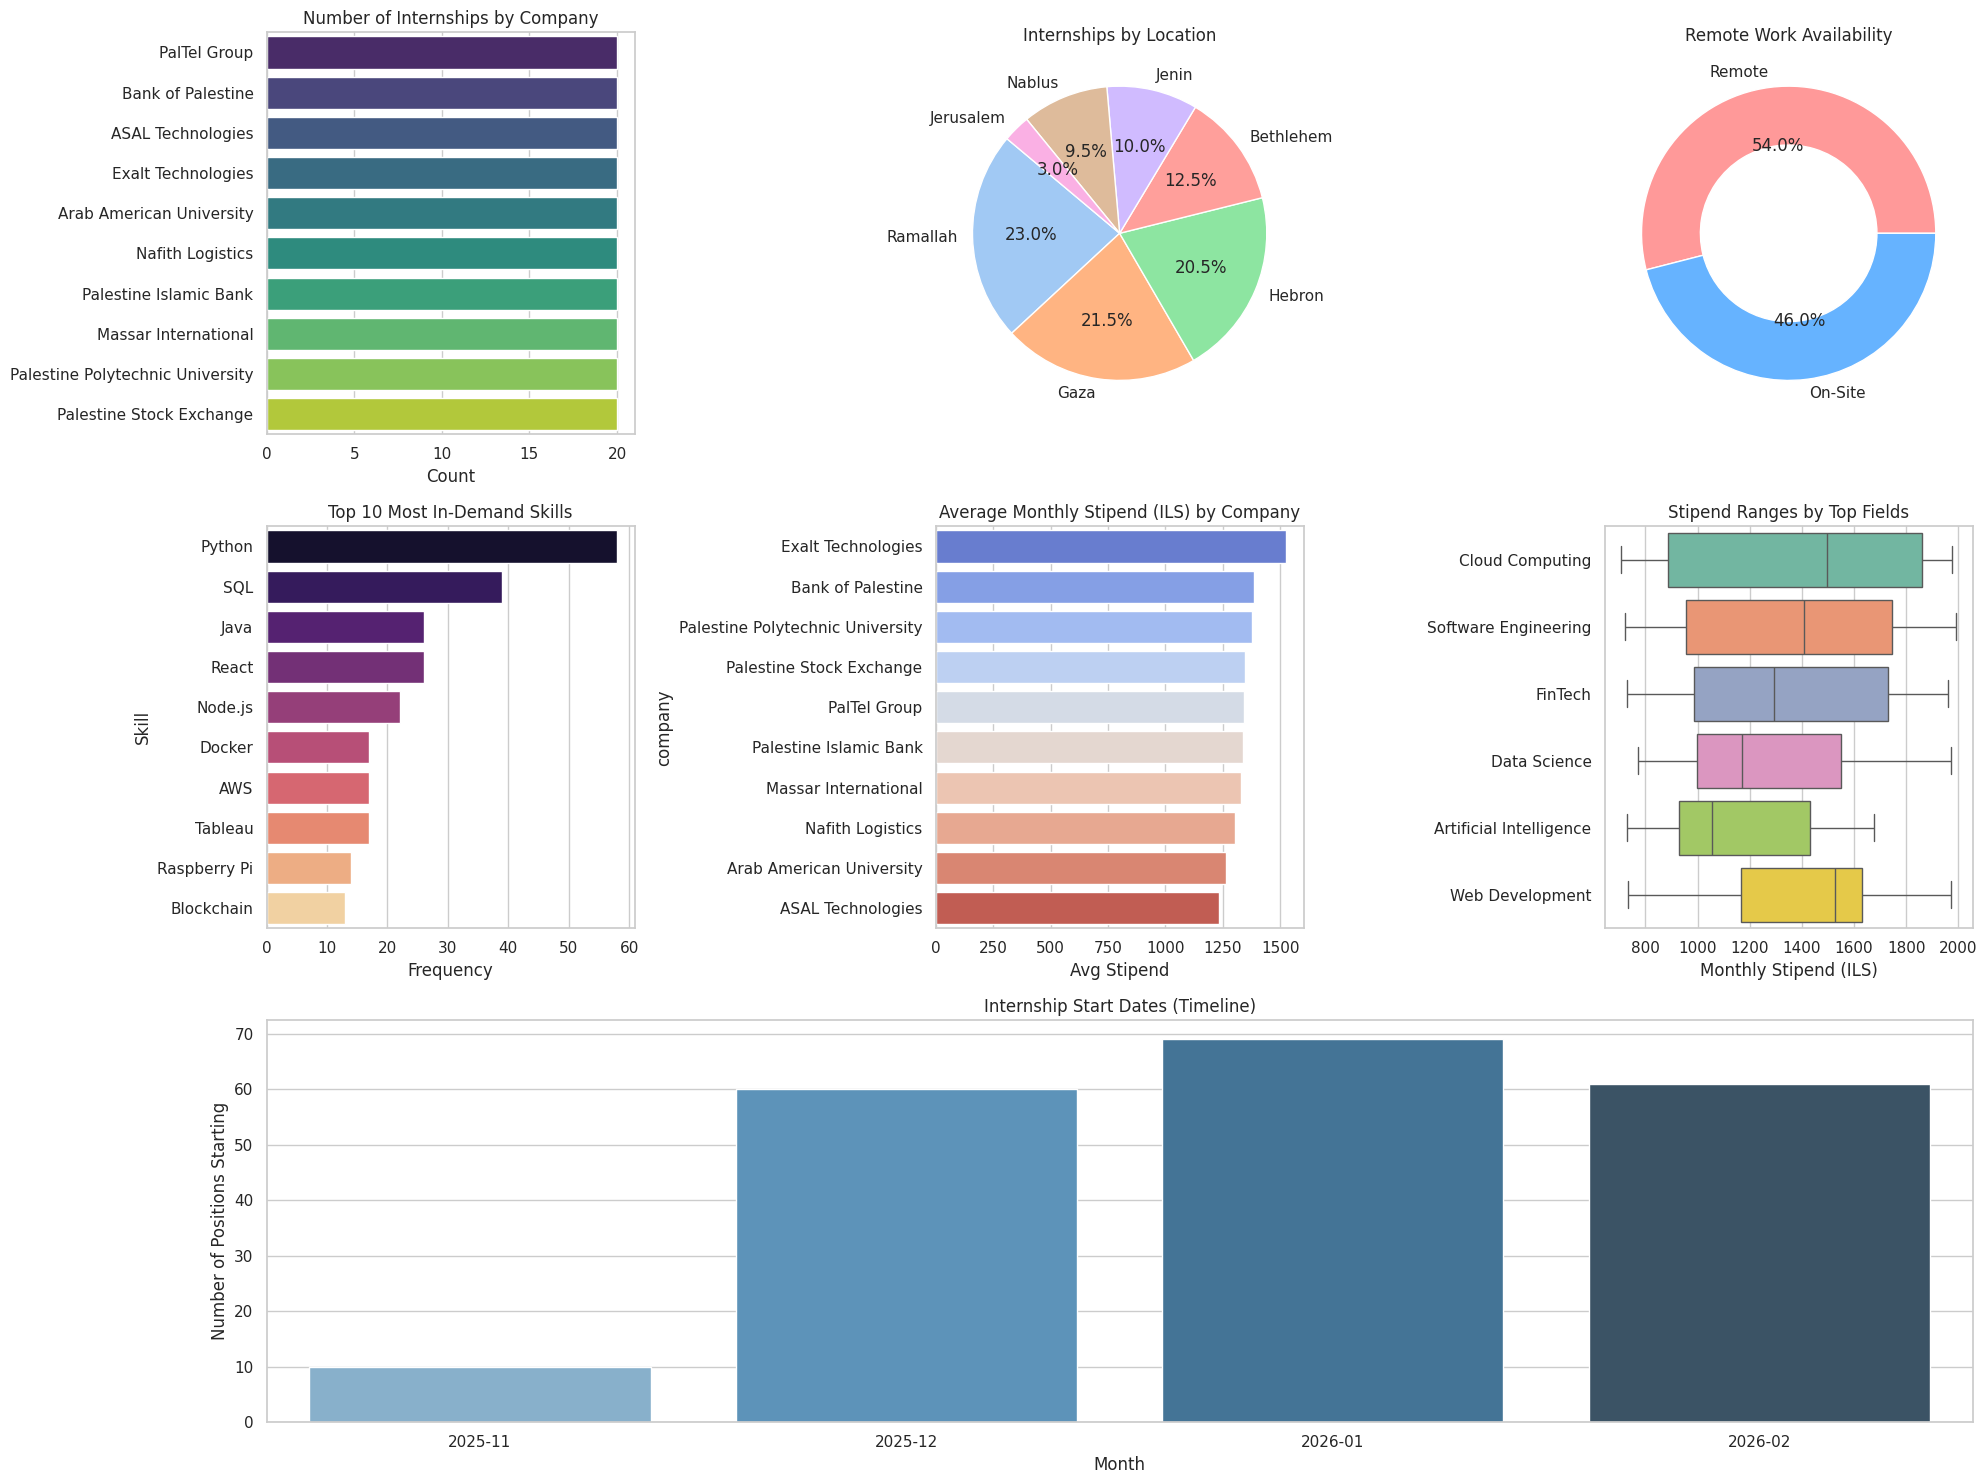

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Load Data
# CSV data is saved as 'palestinian_internships_200.csv'
df = pd.read_csv('palestinian_internships_200.csv')

# 2. Preprocessing
# Convert duration to numeric
df['duration_months'] = df['duration'].str.extract('(\d+)').astype(int)

# Convert start_date to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Parse Skills (Split comma-separated strings)
all_required_skills = []
df['required_skills'].dropna().apply(lambda x: all_required_skills.extend([s.strip() for s in x.split(',')]))
skill_counts = Counter(all_required_skills)
df_skills = pd.DataFrame(skill_counts.most_common(10), columns=['Skill', 'Count'])

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# --- CREATE DASHBOARD ---
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 3)

# 1. Internships by Company (Bar Chart)
ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(y='company', data=df, order=df['company'].value_counts().index, palette='viridis', ax=ax1)
ax1.set_title('Number of Internships by Company')
ax1.set_xlabel('Count')
ax1.set_ylabel('')

# 2. Geographic Distribution (Pie Chart)
ax2 = fig.add_subplot(gs[0, 1])
loc_counts = df['location'].value_counts()
ax2.pie(loc_counts, labels=loc_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
ax2.set_title('Internships by Location')

# 3. Remote vs On-site (Donut Chart)
ax3 = fig.add_subplot(gs[0, 2])
remote_counts = df['remote_possible'].value_counts()
labels = ['On-Site', 'Remote'] if remote_counts.index[0] == False else ['Remote', 'On-Site']
ax3.pie(remote_counts, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], wedgeprops=dict(width=0.4))
ax3.set_title('Remote Work Availability')

# 4. Top 10 Required Skills (Horizontal Bar)
ax4 = fig.add_subplot(gs[1, 0])
sns.barplot(x='Count', y='Skill', data=df_skills, palette='magma', ax=ax4)
ax4.set_title('Top 10 Most In-Demand Skills')
ax4.set_xlabel('Frequency')

# 5. Average Stipend by Company (Bar Chart)
ax5 = fig.add_subplot(gs[1, 1])
avg_stipend = df.groupby('company')['monthly_stipend'].mean().sort_values(ascending=False)
sns.barplot(x=avg_stipend.values, y=avg_stipend.index, palette='coolwarm', ax=ax5)
ax5.set_title('Average Monthly Stipend (ILS) by Company')
ax5.set_xlabel('Avg Stipend')

# 6. Stipend Distribution by Field (Box Plot)
ax6 = fig.add_subplot(gs[1, 2])
# Filter for top 6 fields to keep chart readable
top_fields = df['field'].value_counts().nlargest(6).index
df_top_fields = df[df['field'].isin(top_fields)]
sns.boxplot(x='monthly_stipend', y='field', data=df_top_fields, palette='Set2', ax=ax6)
ax6.set_title('Stipend Ranges by Top Fields')
ax6.set_xlabel('Monthly Stipend (ILS)')
ax6.set_ylabel('')

# 7. Start Date Timeline (Histogram/Time Series)
ax7 = fig.add_subplot(gs[2, :])
df['start_month'] = df['start_date'].dt.to_period('M').astype(str)
dates_order = sorted(df['start_month'].unique())
sns.countplot(x='start_month', data=df, order=dates_order, palette='Blues_d', ax=ax7)
ax7.set_title('Internship Start Dates (Timeline)')
ax7.set_xlabel('Month')
ax7.set_ylabel('Number of Positions Starting')

plt.tight_layout()
plt.show()